Task - 1

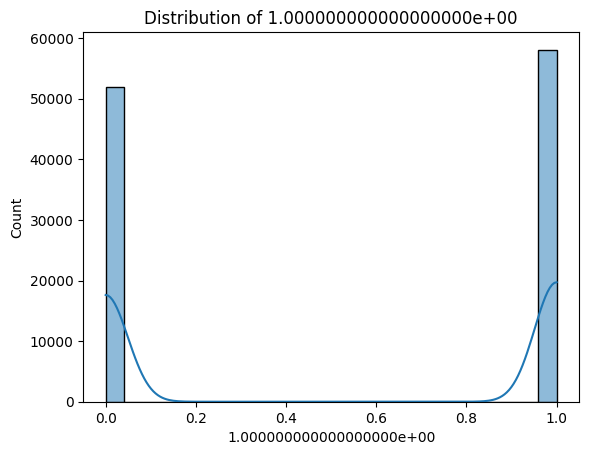

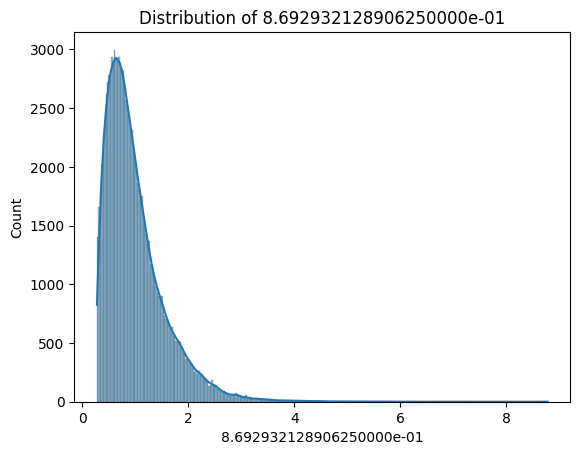

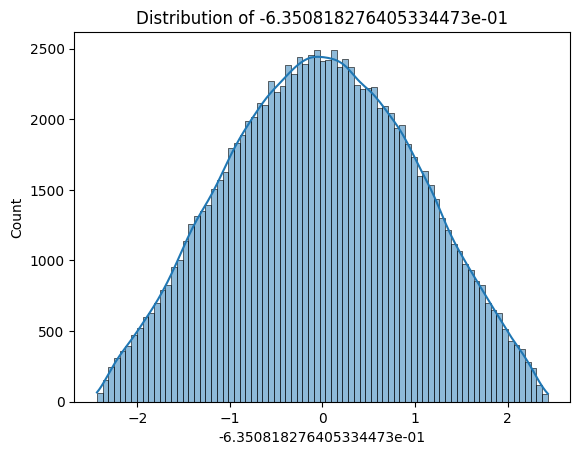

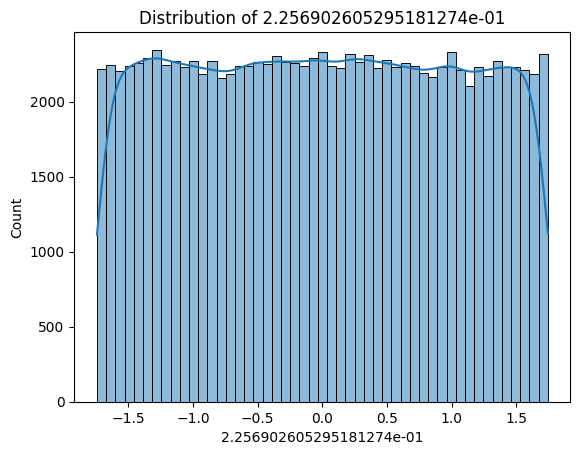

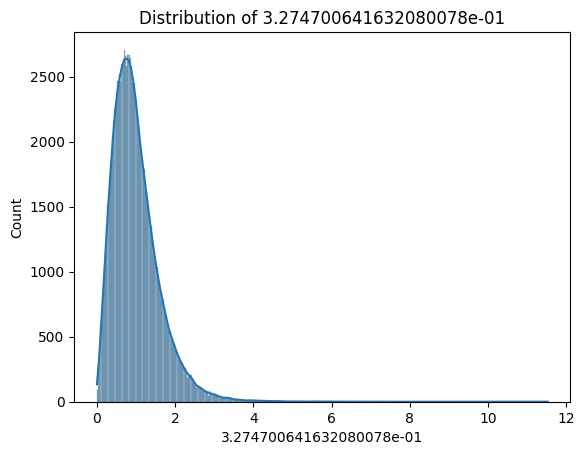

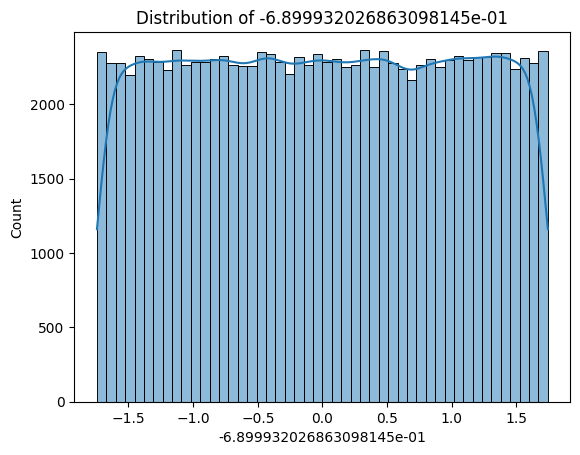

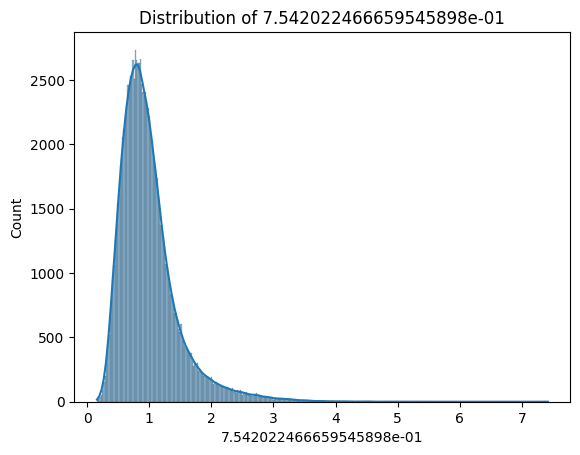

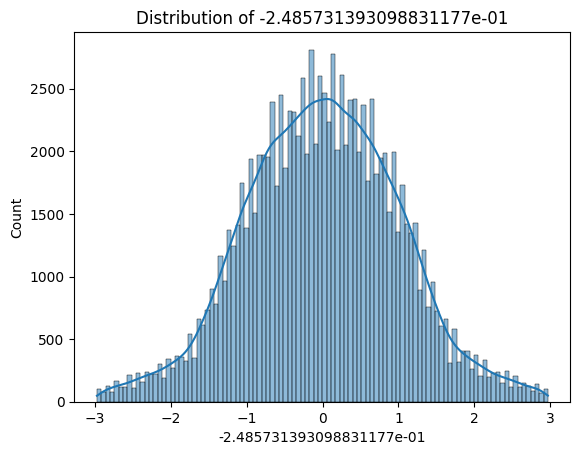

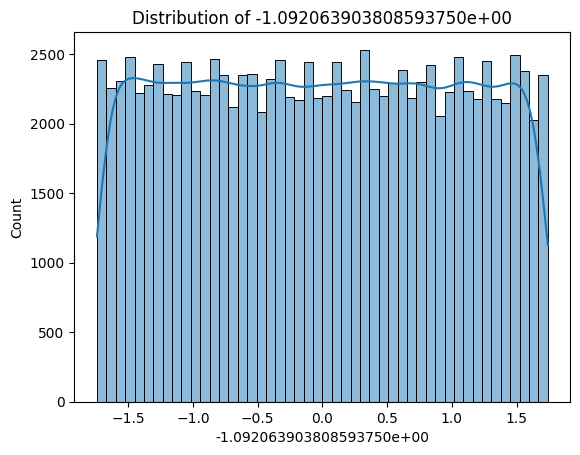

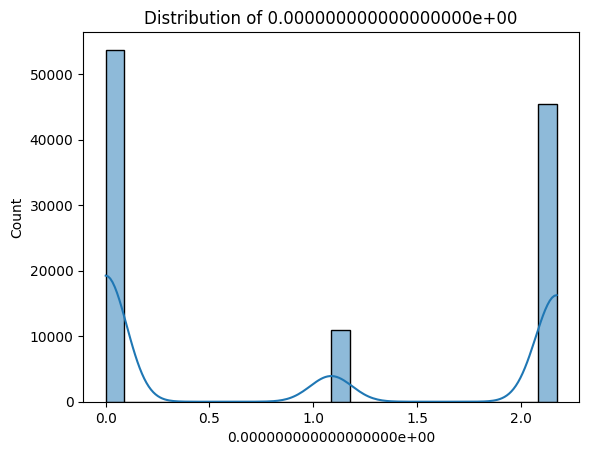

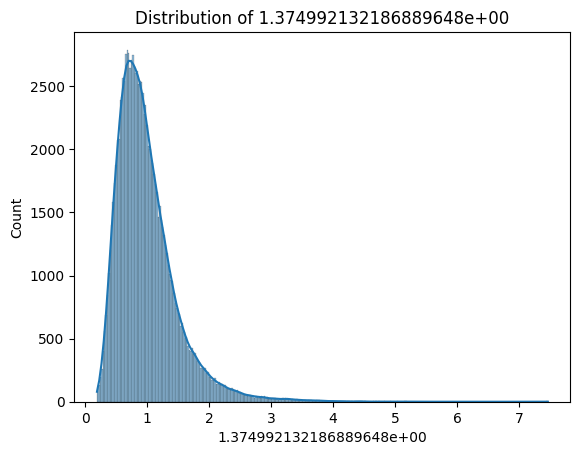

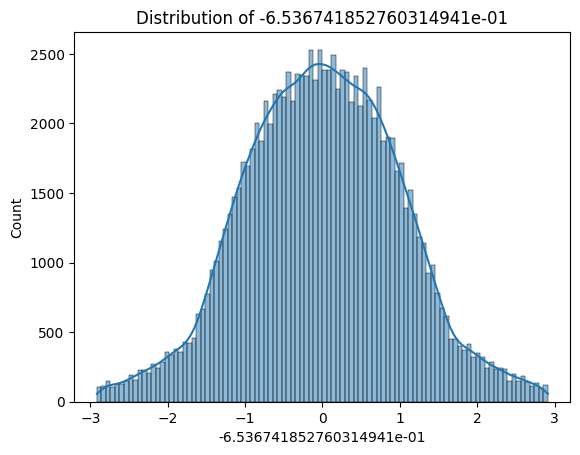

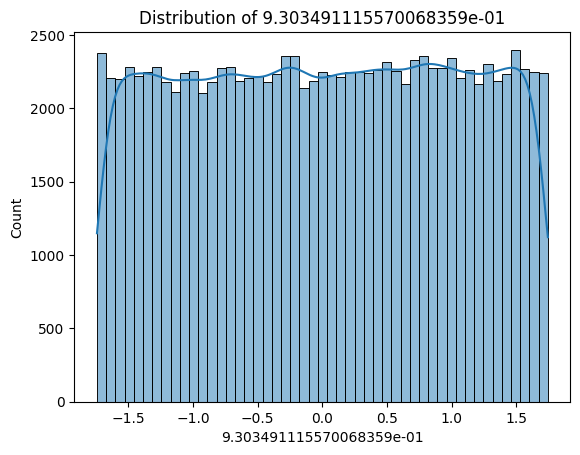

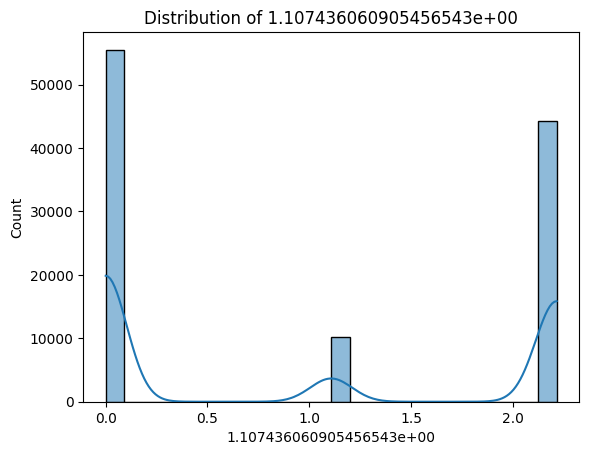

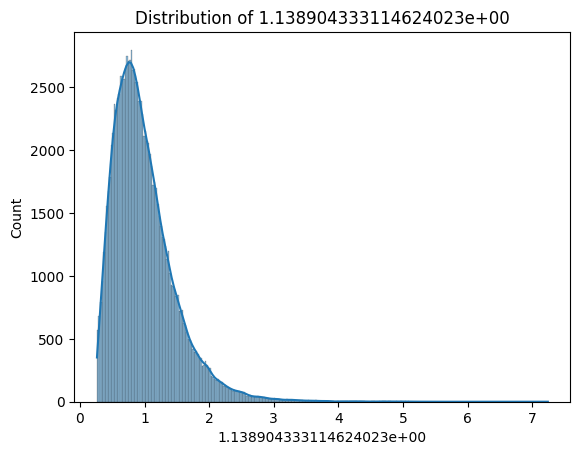

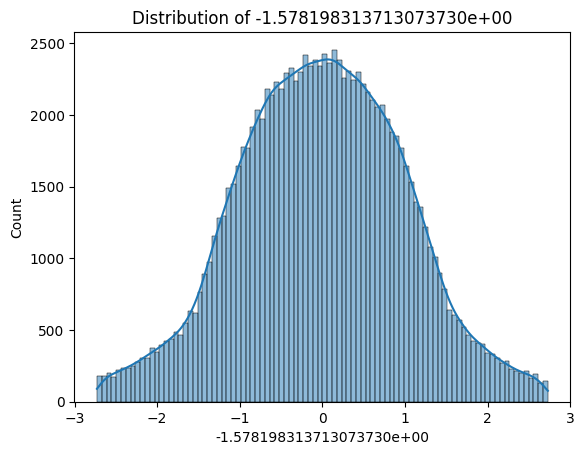

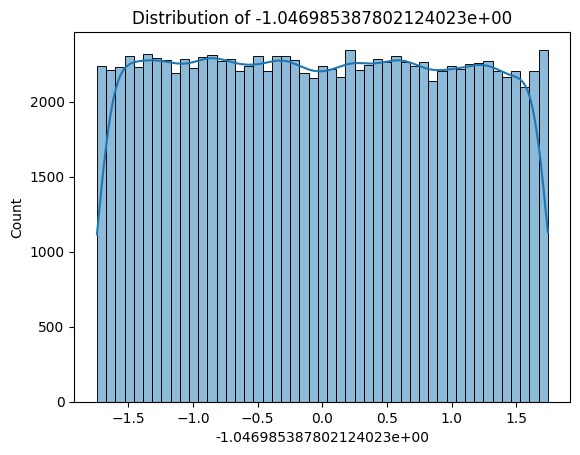

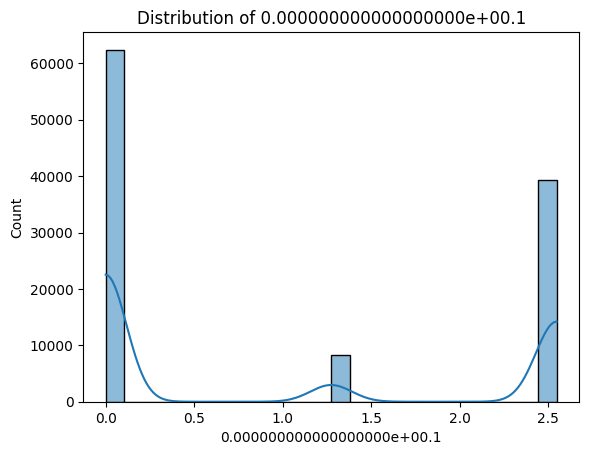

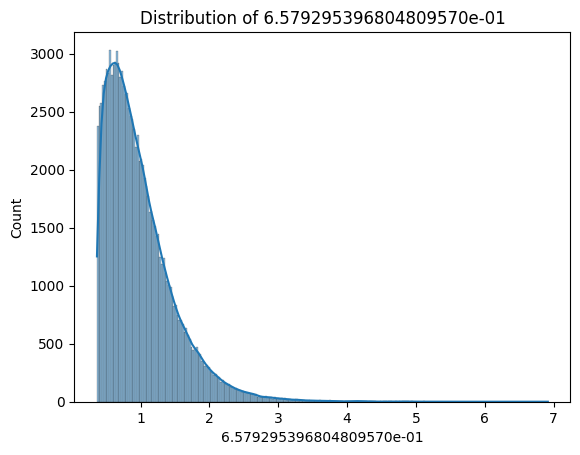

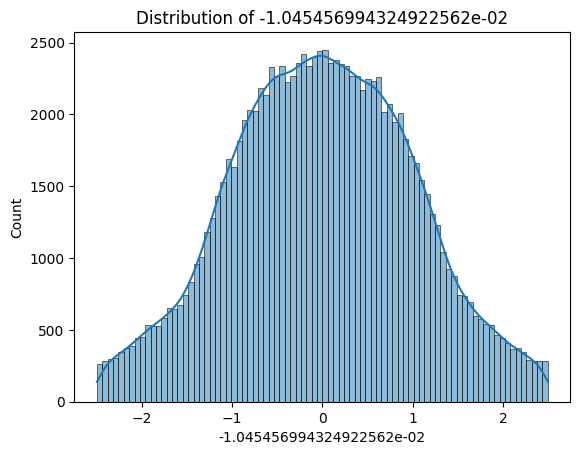

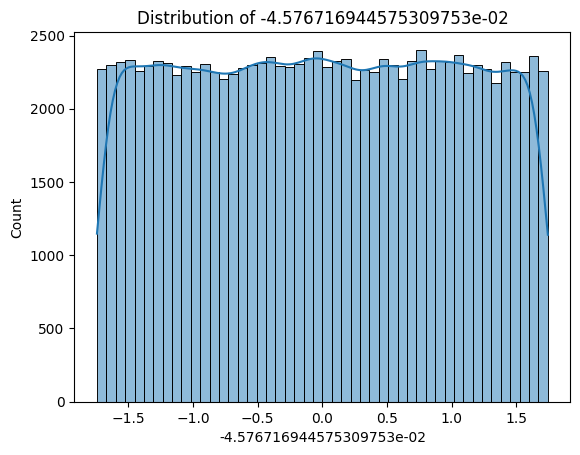

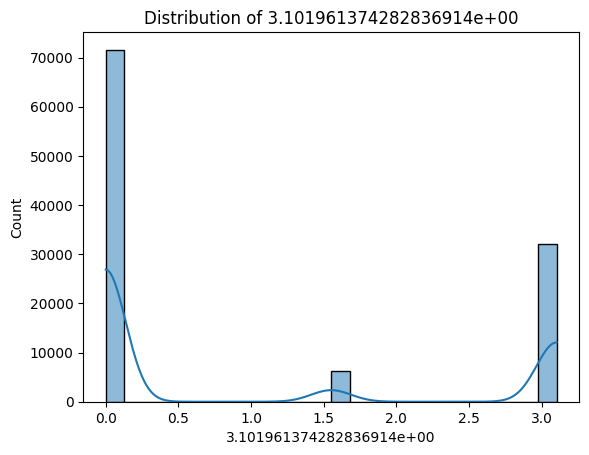

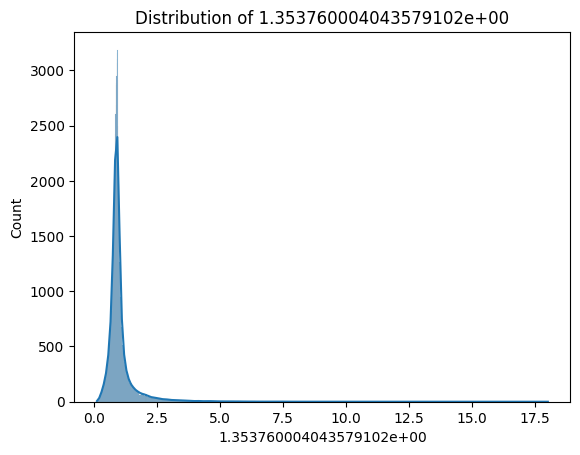

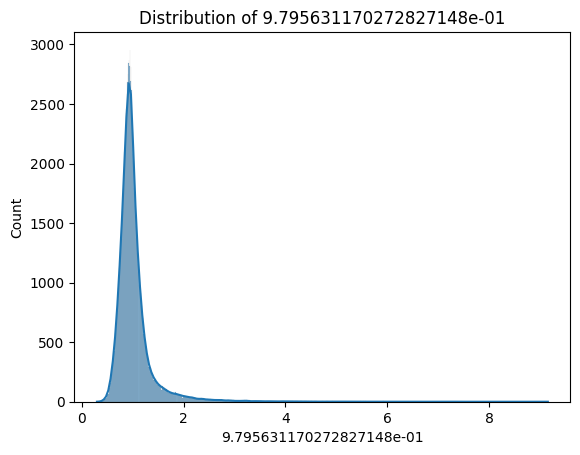

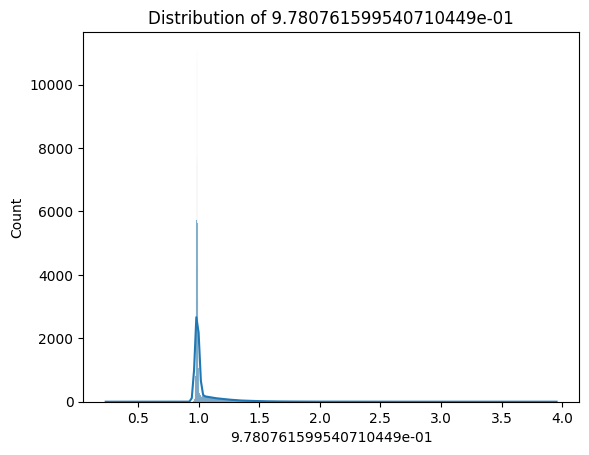

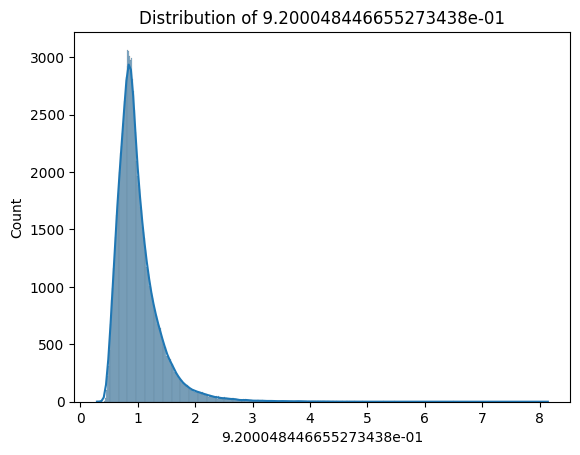

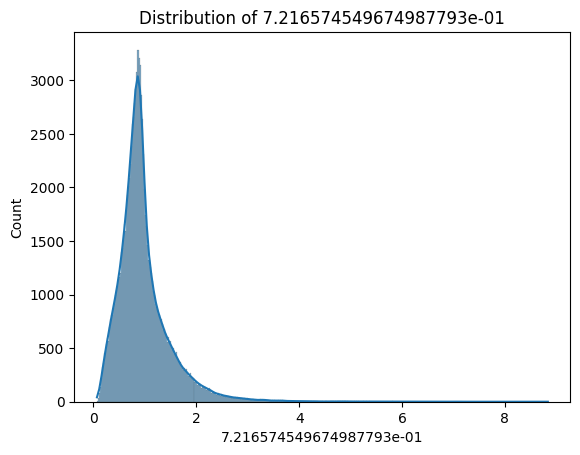

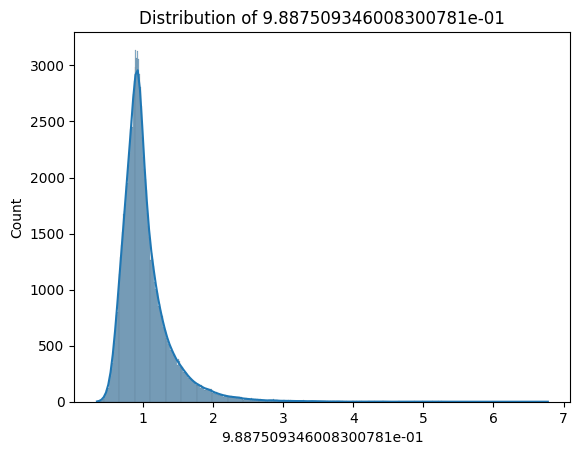

/Users/tikusmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/tikusmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [10]:
# Importing necessary libraries for Task 1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif

# Load Data and Sample 1%
data = pd.read_csv('HIGGS.csv')  # Assuming 'higgs.csv' is the full dataset
data_sampled = data.sample(frac=0.01, random_state=42)  # Use only 1% of the data

# Separate features and target
X = data_sampled.iloc[:, :-1]  # Assuming the last column is the target
y = data_sampled.iloc[:, -1]

# 1. Exploratory Data Analysis (EDA)
# Visualize feature distributions
for column in X.columns:
    sns.histplot(X[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

# 2. Data Normalization/Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)

# 4. Feature Selection
selector = SelectKBest(score_func=f_classif, k=15)  # Select top 15 features
X_selected = selector.fit_transform(X_poly, y)


Task - 2

In [11]:
import numpy as np  # Ensure numpy is imported
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Check if target values are binary; convert if necessary
print("Unique values in target before processing:", y.unique())
if not np.array_equal(y.unique(), [0, 1]):
    # Convert continuous target to binary based on a threshold (e.g., 0.5)
    y = (y > 0.5).astype(int)
print("Unique values in target after processing:", y.unique())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Linear SVM Model
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Cross-validation and evaluation
cv_scores = cross_val_score(linear_svm, X_train, y_train, cv=5)
y_pred = linear_svm.predict(X_test)

# Report key classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Linear SVM Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC: {auc}")

# Scalability and Efficiency - Linear SVM with Stochastic Gradient Descent (SGD)
# Using SGDClassifier for large-scale dataset efficiency
sgd_svm = SGDClassifier(max_iter=1000, tol=1e-3)
sgd_svm.fit(X_train, y_train)
print("SGD-based Linear SVM Training Complete")


Unique values in target before processing: [1.48643363 2.34264231 0.75008076 ... 1.29238737 1.18122268 1.10127962]
Unique values in target after processing: [1 0]
Linear SVM Performance:
Accuracy: 0.9982727272727273
Precision: 0.9983628177725227
Recall: 0.999908904577545
F1-Score: 0.999135263062079
AUC: 0.5999544522887724
SGD-based Linear SVM Training Complete


Task - 3

In [12]:
# Importing necessary libraries for Task 3
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

# Polynomial SVM with Grid Search for hyperparameter tuning
param_grid_poly = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
poly_svm = GridSearchCV(SVC(kernel='poly'), param_grid_poly, cv=3)
poly_svm.fit(X_train, y_train)
poly_best_model = poly_svm.best_estimator_

# RBF SVM with Grid Search for hyperparameter tuning
param_grid_rbf = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}
rbf_svm = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=3)
rbf_svm.fit(X_train, y_train)
rbf_best_model = rbf_svm.best_estimator_

# Custom Kernel (Sigmoid) with Grid Search for hyperparameter tuning
param_grid_sigmoid = {'C': [0.1, 1, 10]}
sigmoid_svm = GridSearchCV(SVC(kernel='sigmoid'), param_grid_sigmoid, cv=3)
sigmoid_svm.fit(X_train, y_train)
sigmoid_best_model = sigmoid_svm.best_estimator_

# Compare Performance Metrics for each kernel
for model, name in [(poly_best_model, 'Polynomial'), (rbf_best_model, 'RBF'), (sigmoid_best_model, 'Sigmoid')]:
    y_pred = model.predict(X_test)
    print(f"\n{name} Kernel Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC: {roc_auc_score(y_test, y_pred):.4f}")

# Time Complexity Analysis for each kernel
# Measuring both training and prediction times
for model, name in [(poly_best_model, 'Polynomial'), (rbf_best_model, 'RBF'), (sigmoid_best_model, 'Sigmoid')]:
    # Measure training time
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    
    # Measure prediction time
    start_pred = time.time()
    model.predict(X_test)
    end_pred = time.time()
    
    # Output the time taken for training and prediction
    print(f"\n{name} Kernel Training Time: {end_train - start_train:.4f} seconds")
    print(f"{name} Kernel Prediction Time: {end_pred - start_pred:.4f} seconds")



Polynomial Kernel Performance:
Accuracy: 0.9980
Precision: 0.9980
Recall: 1.0000
F1-Score: 0.9990
AUC: 0.5000

RBF Kernel Performance:
Accuracy: 0.9982
Precision: 0.9985
Recall: 0.9997
F1-Score: 0.9991
AUC: 0.6332

Sigmoid Kernel Performance:
Accuracy: 0.9966
Precision: 0.9980
Recall: 0.9987
F1-Score: 0.9983
AUC: 0.4993

Polynomial Kernel Training Time: 0.7135 seconds
Polynomial Kernel Prediction Time: 0.0979 seconds

RBF Kernel Training Time: 0.7844 seconds
RBF Kernel Prediction Time: 0.2853 seconds

Sigmoid Kernel Training Time: 0.9169 seconds
Sigmoid Kernel Prediction Time: 0.1479 seconds


Task - 4


Optimal Hyperparameters for RBF Kernel:
Best C: 10
Best Gamma: 0.01

Best RBF Kernel Model Performance after Hyperparameter Tuning:
Accuracy: 0.9982
Precision: 0.9985
Recall: 0.9997
F1-Score: 0.9991
AUC: 0.6332


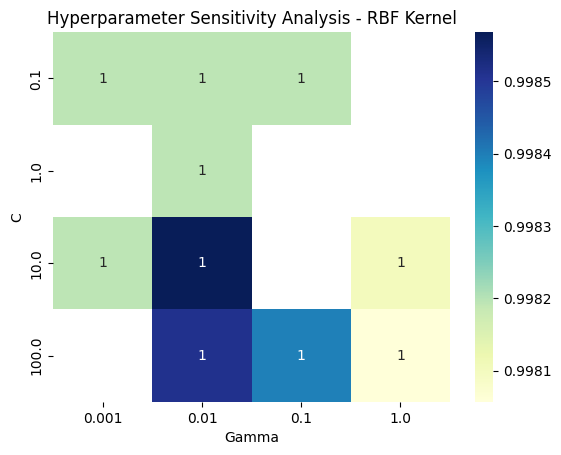

In [13]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Hyperparameter Tuning with Random Search for RBF Kernel
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
random_search = RandomizedSearchCV(SVC(kernel='rbf'), param_grid, cv=5, n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

# Report the best parameters and performance
best_rbf_model = random_search.best_estimator_
print("\nOptimal Hyperparameters for RBF Kernel:")
print(f"Best C: {random_search.best_params_['C']}")
print(f"Best Gamma: {random_search.best_params_['gamma']}")

# Evaluate best model on test set
y_pred_best = best_rbf_model.predict(X_test)
print("\nBest RBF Kernel Model Performance after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_pred_best):.4f}")

# Hyperparameter Sensitivity Analysis: Heatmap for C and gamma
results = pd.DataFrame(random_search.cv_results_)
heatmap_data = results.pivot_table(values="mean_test_score", index="param_C", columns="param_gamma")
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title("Hyperparameter Sensitivity Analysis - RBF Kernel")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.show()


Task - 5

  0%|          | 0/100 [00:00<?, ?it/s]

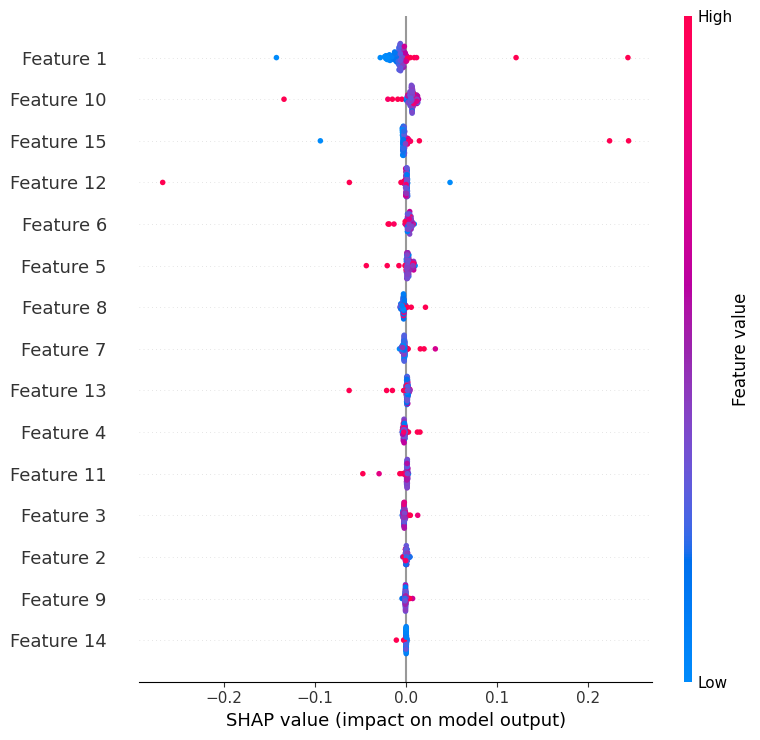

In [14]:
# Importing SHAP for model explainability
import shap

# Reducing the background sample size for faster computation
X_background = shap.sample(X_test, 100)  # Selecting 100 samples for background

# Using SHAP to explain predictions of the linear SVM model with sampled background data
explainer = shap.KernelExplainer(linear_svm.predict, X_background)
shap_values = explainer.shap_values(X_test[:100])  # Taking a subset of 100 for faster computation

# Summary plot to show feature importance
shap.summary_plot(shap_values, X_test[:100], feature_names=[f'Feature {i+1}' for i in range(X_selected.shape[1])])
